## algorithm design and anlysis-2025 spring  homework 1 
**Deadline**：2025.5.14

**name**:斯宇


note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1

对于下面的每一对表达式(A, B), A是否能表示为B的 $\Theta, \Omega ,O$形式. 请注意, 这些关系中的零个、一个或多个可能成立。列出所有正确的。经常发生一些学生会,把指示写错, 所以请把关系写完整, 例如: $A = O(B),  A =\Theta(B)$, 或$A = \Omega(B)$。

1. $A=n^2-100n, B=n^2$
2. $A=logn, B=log_{1.2}n$
3. $A=3^{2n}, B=2^{4n}$
4. $A=2^{logn}, B=n$
5. $A=\log{\log}{n},B=10^{10^{100}}$

can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer: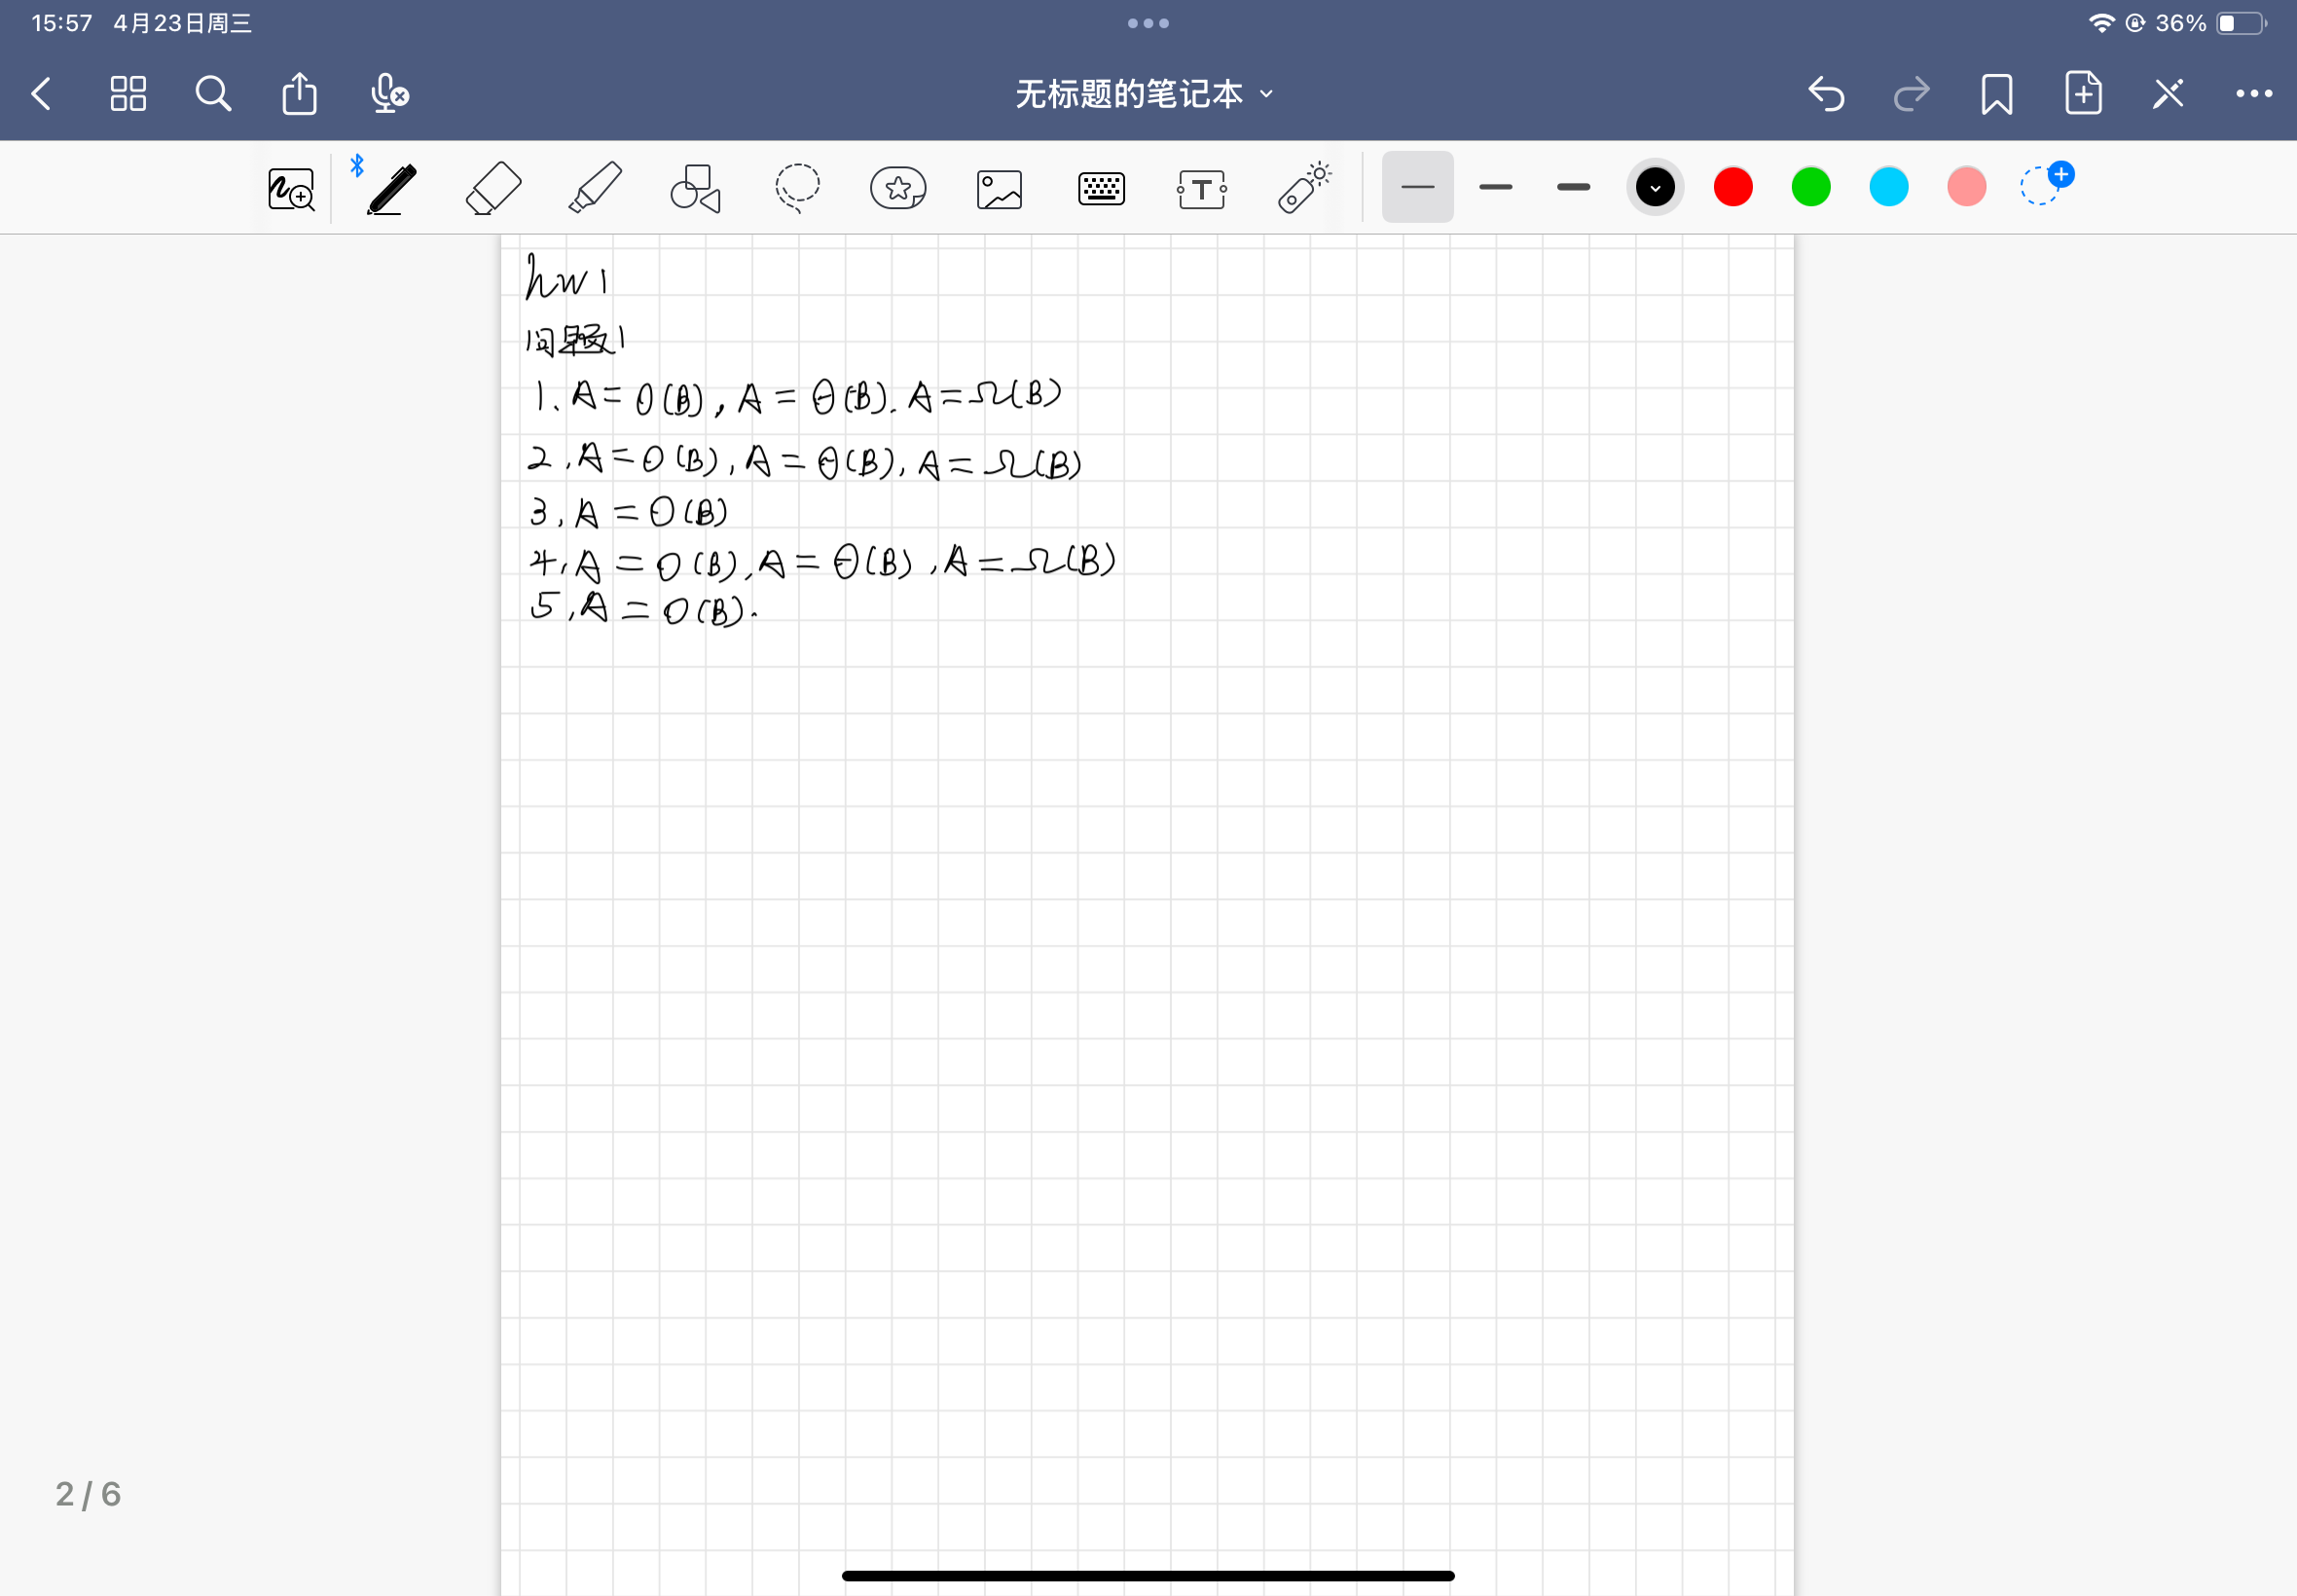


## 问题 2：

假设有函数 $f$ 和 $g$ 使得 $f(n)$ = $O(g(n))$ 对于下面的每一个陈述, 请判断对错, 如果正确请给出证明, 否则请给出一个反例。

1. $\log{f(n)}$ = $O(\log(1+g(n)))$
2. $3^{f(n)}=O(3^{g(n)})$
3. $(f(n))^2=O((g(n))^2)$ 

you can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer: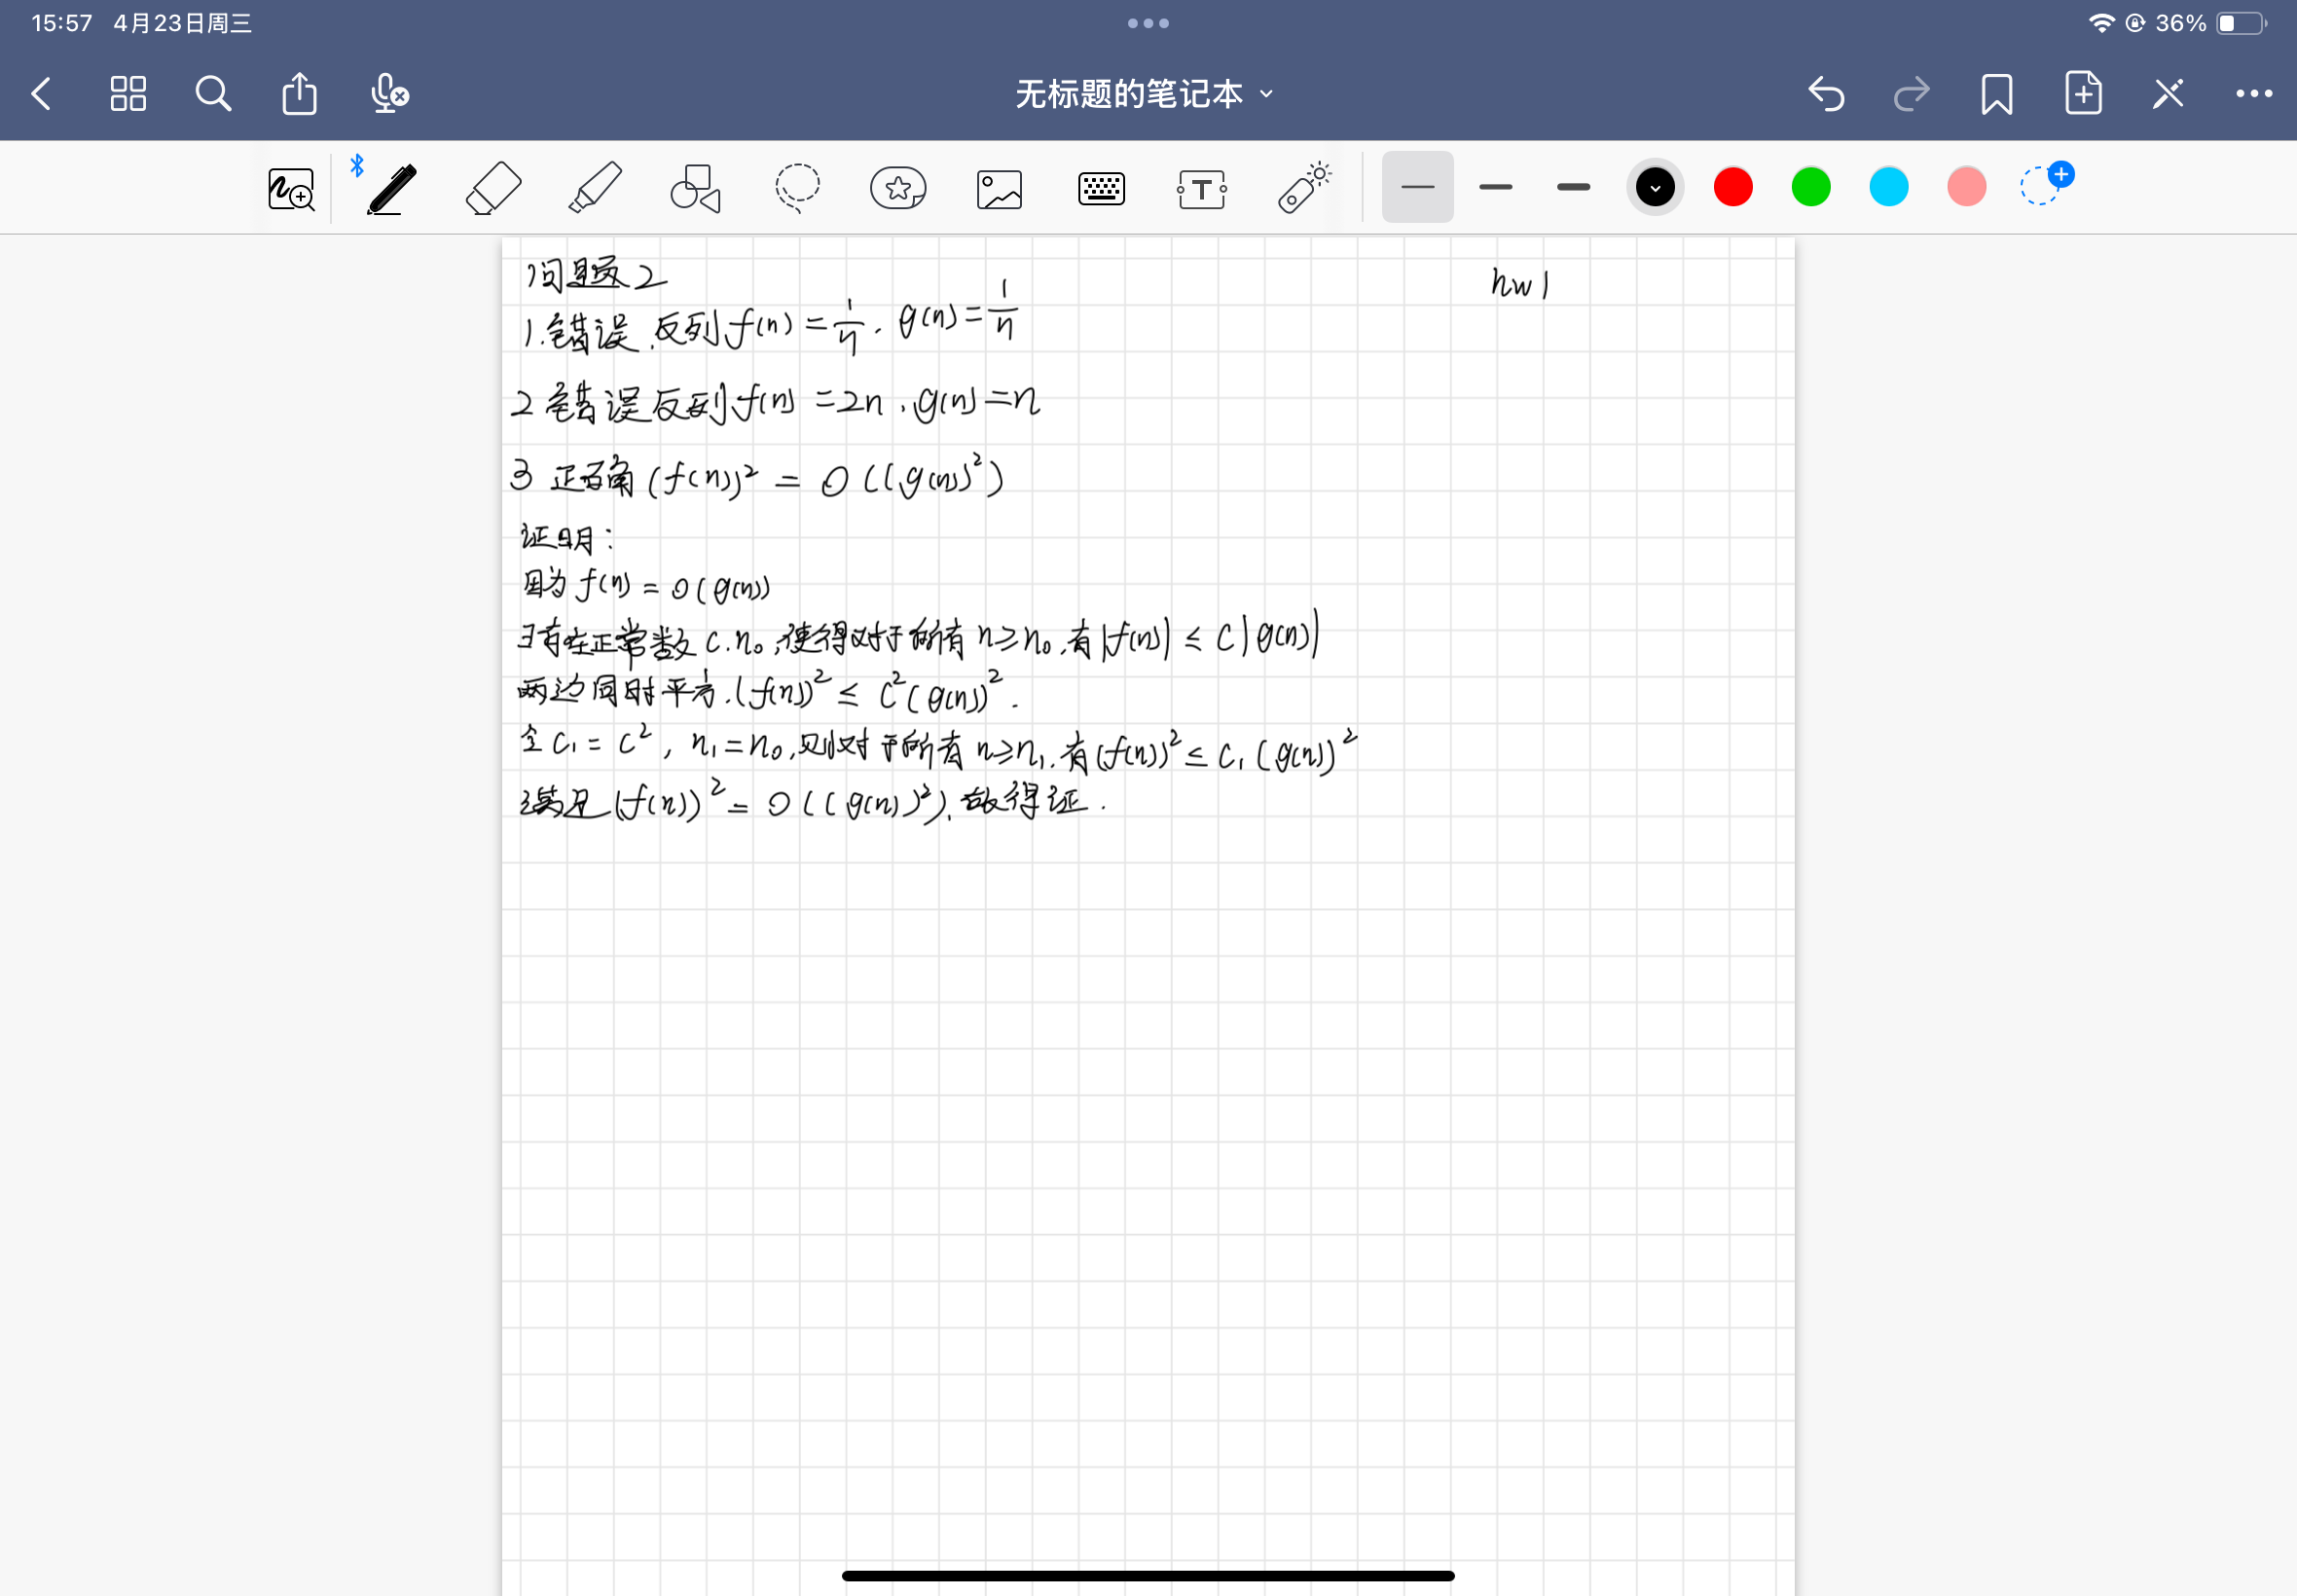

## 问题 3

根据下列递归公式, 计算下列 $T(n)$ 对应的的渐近上界。要求所求的边界尽可能的紧（tight）, 请写明步骤。

1. $T(1)=1; T(n)=T(n/4)+1$ for $n>1$
2. $T(1)=1;T(n)=3T(n/3)+n^2$ for $n>1$
3. $T(1)=1;T(n)=T(2n/3)+1$ for $n>1$
4. $T(1)=1;T(n)=5T(n/4)+n$ for $n>1$
5. $T(n)=1 \ for\ n \le 2 ; T(n)=T(\sqrt{n})+1 \ for \ n>2$

can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer: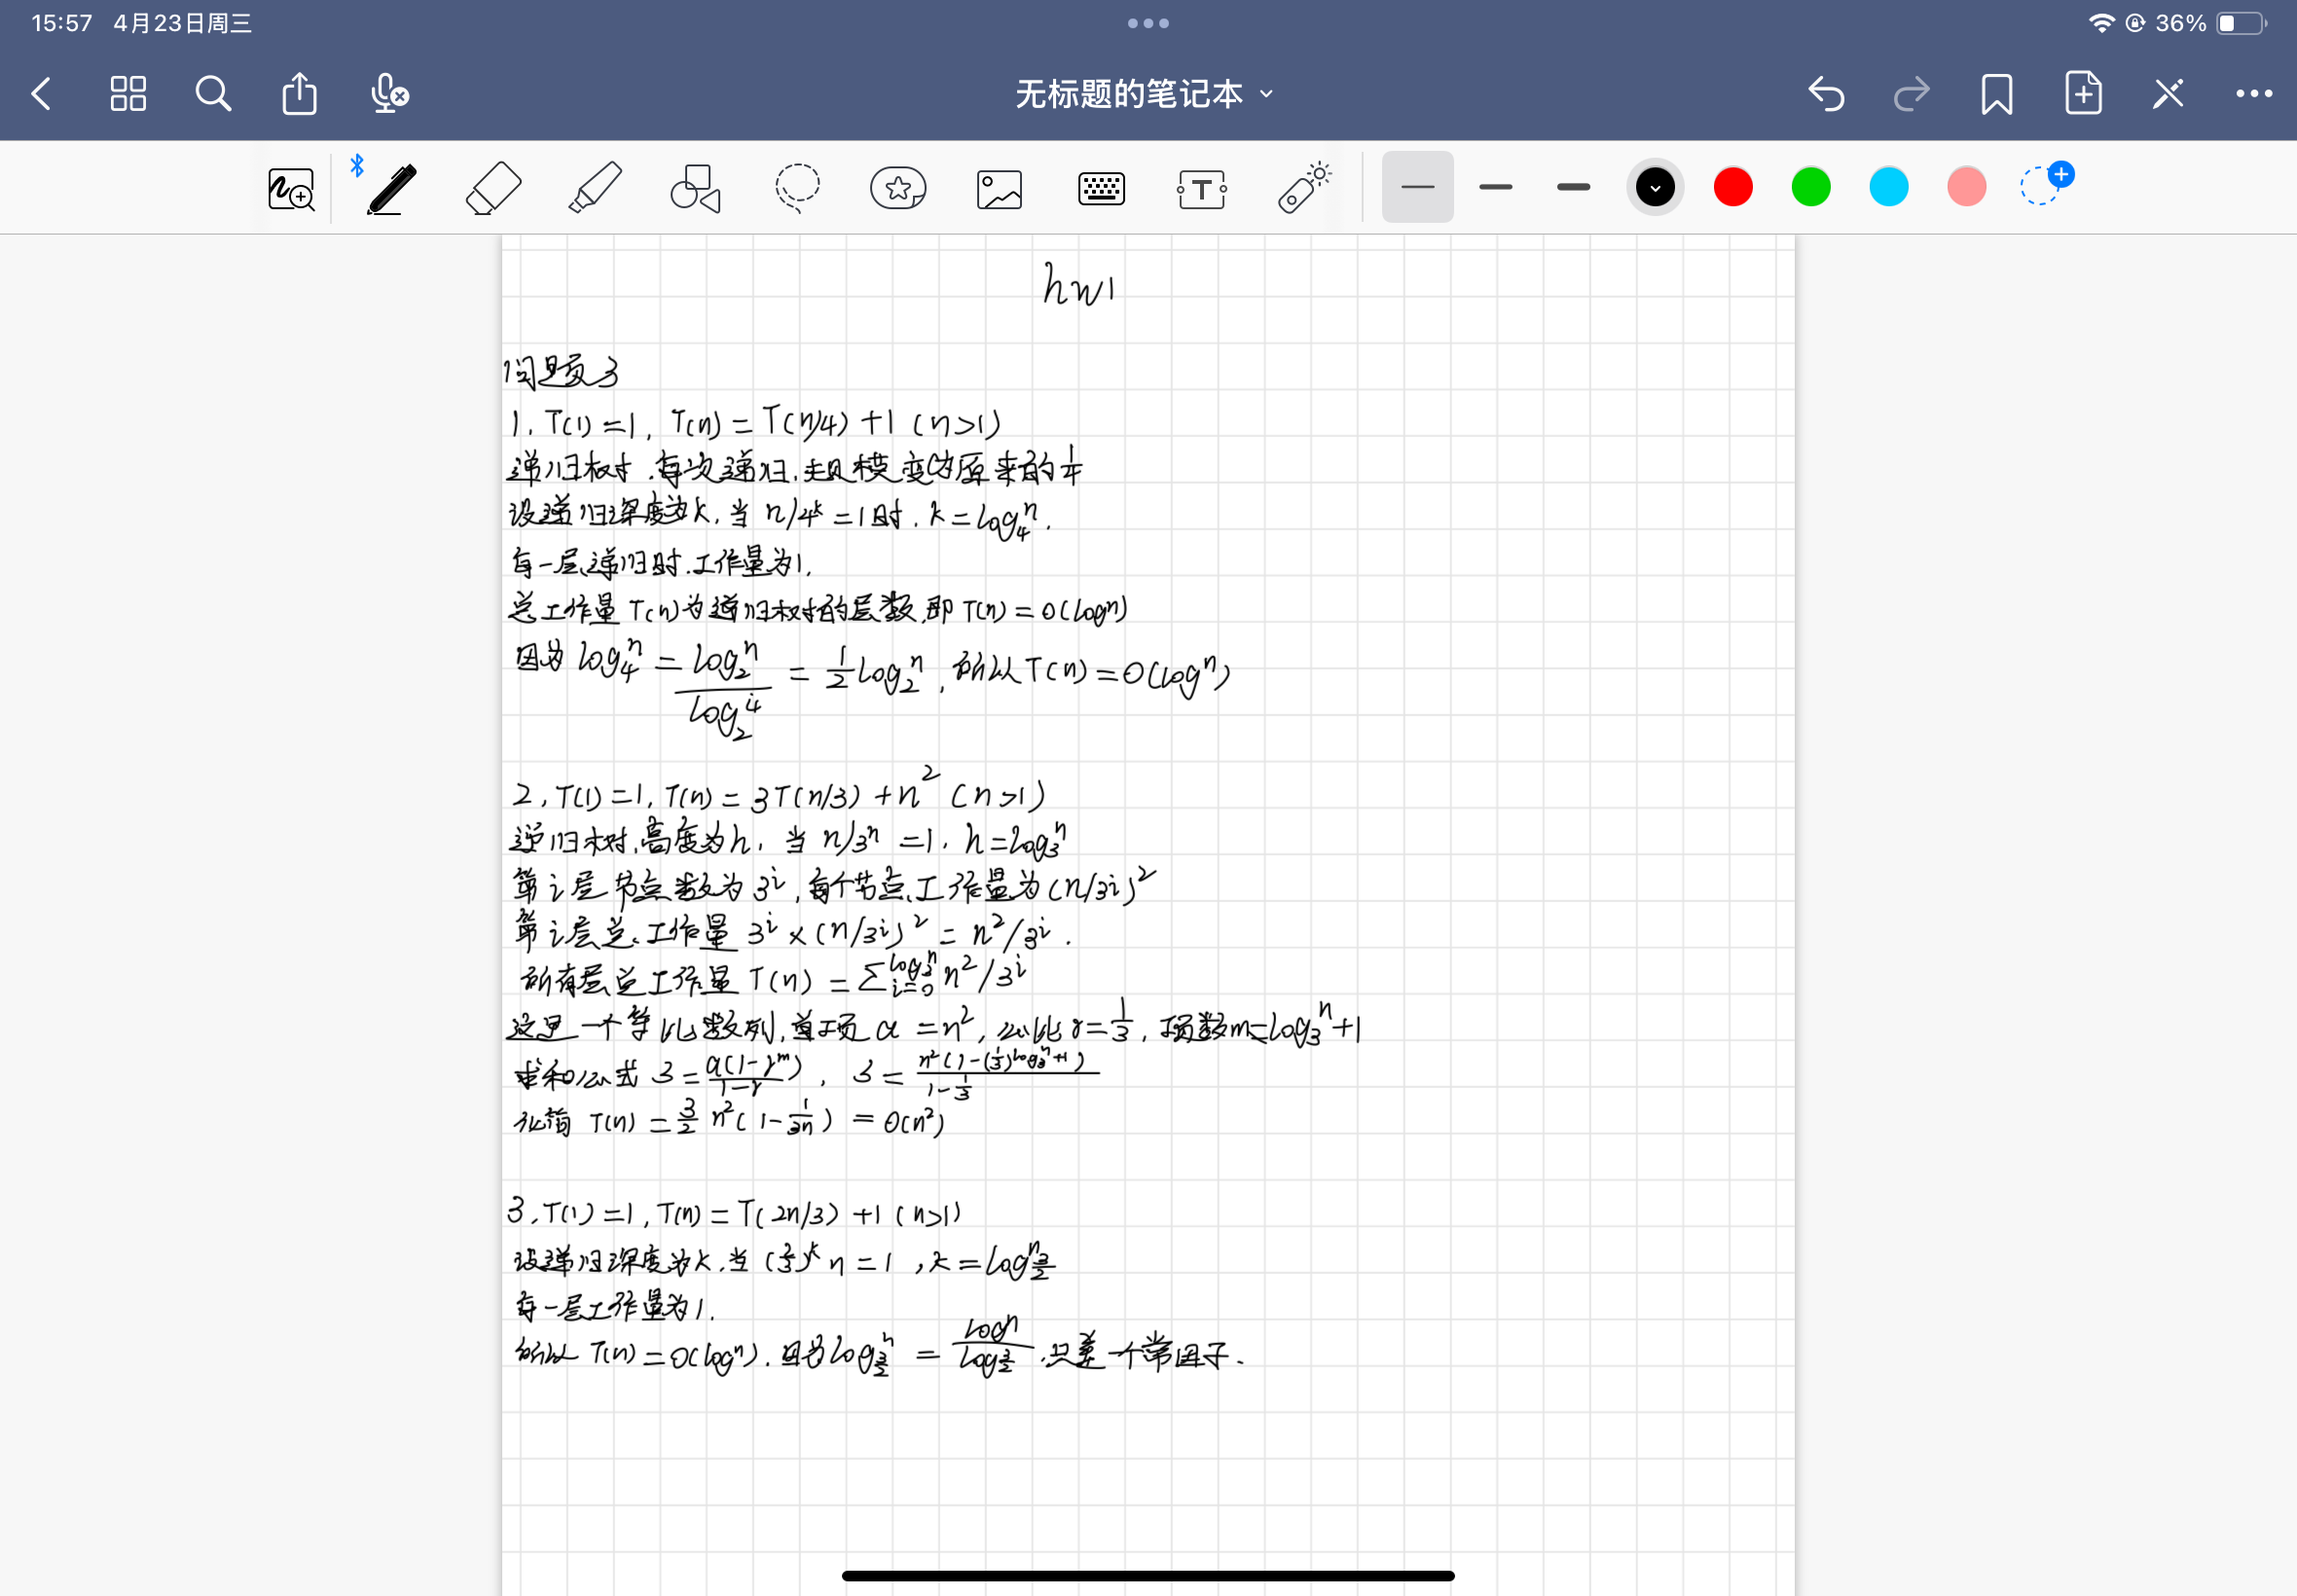

## 问题 4：

给定一个包含n个元素的数组 `profits` , 它的第 `i` 个元素 `profits[i]` 表示一支股票第 `i` 天的**收益**（正数表示涨, 负数表示跌）。你只能选择 **某一天** 买入这只股票, 并选择在 **未来的某一个不同的日子** 卖出该股票。

1. 设计一个算法来计算你所能获取的最大利润和对应买入和卖出的日期。请分析算法方案, 计算其时间复杂度, 并且使用python编程实现该算法。

2. \* 设计一个时间复杂度为 $O(n)$的算法实现该算法

e.g. :
---
profits=[3,2,1,-7,5,2,-1,3,-1], 第5天买入, 第8天卖出, 收益最大：9



idea1:
    
### 思路分析

1.枚举所有可能的买入和卖出日期组合，计算每种组合的收益（买入日期到卖出日期之间所有收益的总和），记录最大收益及对应的日期

2.算法步骤
使用两层循环遍历所有可能的买入卖出组合，外层循环i表示买入日期（从1到n-1），内层循环j表示卖出日期（从i到n），对每个组合计算收益：

sum(profits[i:j+1])，更新最大收益和对应的买入卖出日期

3.复杂度分析时间复杂度：O(n^2)，需要两层循环，每次计算收益需要O(n),空间复杂度：O(1)，只需要常数空间存储结果

idea2:
### 思路分析

采用动态规划的思想，通过一次遍历数组来解决问题。在遍历过程中，维护当前的累计利润 current_profit 和最大利润 max_profit

1.初始化 max_profit 为负无穷，current_profit 为 0，buy_date 和 sell_date 为 0，temp_buy_date 为 0。

2.遍历数组 profits：

2.1 如果 current_profit 小于等于 0，说明从之前的临时买入点开始到现在累计没有盈利，需要重新开始计算利润，将当前元素作为新的起始点，并更新 
temp_buy_date。

2.2 否则，继续累加当前的收益值到 current_profit 中。

2.3 如果 current_profit 大于 max_profit，更新 max_profit、buy_date 和 sell_date。

In [8]:
# add your code 暴力解法
def max_profit_brute_force(profits):
    n = len(profits)
    max_profit = float('-inf')
    buy_day = sell_day = -1
    
    for i in range(n):
        current_sum = 0
        for j in range(i, n):
            current_sum += profits[j]
            if current_sum > max_profit:
                max_profit = current_sum
                buy_day = i + 1  # 转换为1-based索引
                sell_day = j + 1
    
    return max_profit, buy_day, sell_day
# 测试代码
profits = [3, 2, 1, -7, 5, 2, -1, 3, -1]
print("测试数组:", profits)

# 测试暴力解法
profit1, buy1, sell1 = max_profit_brute_force(profits)
print(f"暴力解法 - 最大收益: {profit1}, 买入日期: {buy1}, 卖出日期: {sell1}")

第5天买入，第8天卖出，收益最大：9


In [6]:
# an algorithm with O(n)
def max_profit(profits):
    if not profits:
        return 0, 0, 0
    # 初始化最大利润为负无穷
    max_profit = float('-inf')
    # 初始化当前利润为 0
    current_profit = 0
    # 初始化买入日期
    buy_date = 0
    # 初始化卖出日期
    sell_date = 0
    # 临时记录买入日期
    temp_buy_date = 0
    for i, profit in enumerate(profits):
        if current_profit <= 0:
            # 如果当前利润小于等于 0，重新开始计算利润，并更新临时买入日期
            current_profit = profit
            temp_buy_date = i
        else:
            # 否则，继续累加当前利润
            current_profit += profit
        if current_profit > max_profit:
            # 如果当前利润大于最大利润，更新最大利润、买入日期和卖出日期
            max_profit = current_profit
            buy_date = temp_buy_date
            sell_date = i
    return max_profit, buy_date + 1, sell_date + 1


profits = [3, 2, 1, -7, 5, 2, -1, 3, -1]
max_profit, buy_day, sell_day = max_profit(profits)
print(f"第{buy_day}天买入，第{sell_day}天卖出，收益最大：{max_profit}")
    
# 空间复杂度分析：因为只使用了常数级的额外空间，空间复杂度为O(1)

# 时间复杂度分享：因为只对profits进行了一次遍历，时间复杂度为O(n)

第5天买入，第8天卖出，收益最大：9


## 问题 5：

观察下方的分治算法（divide-and-conquer algorithm）的伪代码, 回答下面问题

```latex
DoSomething(A,p,r)
-----
n := r-p+1
if n=2 and A[p]>A[r] then
    swap A[p] and A[r]
else if n >= 3 then
    m = ceil(2n/3)
    DoSomething(A,p,p+m-1)
    DoSomething(A,r-m+1,r)
    DoSomething(A,p,p+m-1)  
    
---
first call: DoSomething(A,1,n)
```

note：$ceil(2n/3)=\left\lceil {2n/3} \right\rceil$；$:=$ 表示赋值, 等价于 $\to$；A是一个包含n的整数元素的数组, 

1. 写出该算法时间复杂度的递归公式, 并求解其对应的渐进表示
2. 描述一下该算法的功能, 并判断是否是最高效的解决方案
3. 使用python编程实现上述算法或其对应的更高效版本的算法


idea：

# 递归公式推导设

T(n)表示处理长度为 n的数组时该算法的时间复杂度。

当 n=2时，算法仅进行一次比较和可能的交换操作，时间复杂度为常数，即 T(2)=O(1)。

当 n>=3时，算法进行了三次递归调用，每次递归调用处理的子数组长度为m= 2n/3, 同时还有一些常数时间的操作(比如计算 m)，所以递归公式为 

T(n)=3T(2n/3)+O(1)。

求解渐进表示

使用主定理，对于递归式 T(n)=aT(n/b)+f(n)，这里a=3，b=3/2，f(n)=O(1).

2.  **求解渐进表示**：
    我们可以使用主定理来求解此递归式。主定理的形式为 $T(n) = a T(n/b) + f(n)$。
    *   在此问题中，$a = 3$，$b = 3/2$ (因为 $n / (3/2) = 2n/3$)，$f(n) = O(1) = O(n^0)$。
    *   我们需要比较 $f(n)$ 和 $n^{\log_b a}$。
    *   计算 $\log_b a = \log_{3/2} 3 = \frac{\log_2 3}{\log_2 (3/2)} = \frac{\log_2 3}{\log_2 3 - \log_2 2} \approx \frac{1.585}{1.585 - 1} = \frac{1.585}{0.585} \approx 2.7095$。
    *   我们比较 $f(n) = O(n^0)$ 和 $n^{\log_{3/2} 3} \approx n^{2.71}$。
    *   由于 $f(n) = O(n^0)$ 渐进地小于 $n^{\log_{3/2} 3}$ (具体来说， $f(n) = O(n^{\log_{3/2} 3 - \epsilon})$ 对某个 $\epsilon > 0$，例如 $\epsilon = 2$)，这符合主定理的**情况 1**。
    *   因此，解为 $T(n) = \Theta(n^{\log_b a}) = \Theta(n^{\log_{3/2} 3})$。

    所以，该算法的时间复杂度渐进表示为 $\Theta(n^{\log_{3/2} 3})$，约等于 $\Theta(n^{2.71})$。

answer:该算法的主要目的是对数组A进行排序。当子数组长度为 2 时，会确保这两个元素按升序排列；当子数组长度大于等于 3 时，会将数组分成几个子数

组进行递归处理。具体来说，它将数组分成大致为 2/3和1/3的两部分，进行三次递归调用。该算法不是最高效的解决方案，对于排序问题，常见的高效排序

算法如快速排序、归并排序的平均时间复杂度为 O(nlogn)。而此算法的时间复杂度约等于Θ(n^2.71)。很明显性能不是最好的。

In [10]:
# add your code here
# 快排实现
def quick_sort(arr):
    # 如果数组的长度小于等于 1，说明数组已经有序，直接返回该数组
    if len(arr) <= 1:
        return arr
    else:
        # 选择数组的第一个元素作为基准元素
        pivot = arr[0]
        # 遍历数组中除基准元素之外的其他元素
        # 将小于等于基准元素的元素放入 left 列表
        left = [x for x in arr[1:] if x <= pivot]
        # 将大于基准元素的元素放入 right 列表
        right = [x for x in arr[1:] if x > pivot]
        # 递归地对 left 列表和 right 列表进行快速排序
        # 最后将排序好的 left 列表、基准元素和排序好的 right 列表合并
        return quick_sort(left) + [pivot] + quick_sort(right)


# 测试快速排序算法
arr = [5, 3, 8, 4, 2, 7, 1, 6]
sorted_arr = quick_sort(arr)
print("快速排序后的数组:", sorted_arr)
# your algorithm time complexity is :快排是的基本思路是选择一个基准元素，数组分为两部分，对两部分分别排序，对于一个长度为n的数组，
# 需要进行O(nlogn)次划分才能完全排序，每次划分规模减半，所以平均时间复杂度为O(nlogn)

快速排序后的数组: [1, 2, 3, 4, 5, 6, 7, 8]


## 问题 6：

给定一个大小为 `n` 的数组 `nums` , 返回其中的多数元素。多数元素是指在数组中出现次数 **大于** `⌊ n/2 ⌋` 的元素。

你可以假设数组是非空的, 并且给定的数组总是存在多数元素。

1. 设计一个算法找到给定数组的多数元素, 分析算法设计思路, 计算算法时间复杂度, 使用python编程实现
2. \* 设计时间复杂度为 O(n)、空间复杂度为 O(1) 的算法解决此问题, 分析算法设计思路, 使用python编程实现

e.g.:
---
1. nums=[3,2,3], 返回3
2. nums=[2,2,1,1,1,2,2], 返回2


idea：不考虑时间复杂度的情况下，可以通过双重for循环，外层来遍历数组中的元素，内层来统计当前元素出现的次数，然后通过简单的判断数量即可

In [12]:
# add your code here
def majorityElement(nums):
    n = len(nums)
    # 外层循环遍历数组中的每个元素
    for num in nums:
        count = 0
        # 内层循环统计当前元素在数组中出现的次数
        for elem in nums:
            if elem == num:
                count = count + 1
        # 检查该元素的出现次数是否大于 ⌊ n/2 ⌋
        if count > n // 2:
            return num


nums1 = [3, 2, 3]
print(majorityElement(nums1))

nums2 = [2, 2, 1, 1, 1, 2, 2]
print(majorityElement(nums2))
    
    
# your algorithm time complexity is :因为两层嵌套循环，外层遍历数组中每个元素，执行n次，内层循环同样遍历数组统计元素的出现次数，

# 同样执行了n次，因此总的时间复杂度为O(n*n);空间复杂度为O(1)，因为只额外使用了常数级的空间。

3
2


idea for 2\*：因为要在时间复杂度为O(n)的情况下解决，不能采取嵌套循环，可以采取投票的思路来通过一层循环解决，从数组中找出一对不同的元素并将

其从数组中删除，直到数组为空或只有一种元素。因为多数元素出现的次数大于 ⌊n/2⌋，所以最后剩下的元素一定是多数元素。带入到本题来就是通过一个

count计数来实现。

初始化候选元素和计数，当数组遍历时元素==候选者(candidate)，我们就对计数加一，此时就相当于没有遇到不同的元素，不进行删除操作。

如果遇到了元素不等于候选者(candidate),计数加一，相当于进行了"删除"操作。

更新候选元素：当计数count为0，表示之前的candidate元素在这一轮的"删除"操作中被完全抵消了，这时他已经不满足多数元素，所有从新指定候选者，并

且cont置为1，重新开始计数，当遍历完整数组，因为多数元素，大于数组的一半，即使不断的删除，他也不会为0，就会存下来，就是最后的答案。


In [13]:
# algorithm time complexity：O(n), space complexity:O(1)
# add your code here
def majorityElement(nums):
    # 初始化候选元素为数组的第一个元素
    candidate = nums[0]
    # 初始化候选元素的计数为 1
    count = 1
    # 从数组的第二个元素开始遍历
    for num in nums[1:]:
        if num == candidate:
            # 如果当前元素等于候选元素，计数加 1
            count += 1
        else:
            # 如果当前元素不等于候选元素，计数减 1
            count -= 1
            if count == 0:
                # 当计数为 0 时，更新候选元素为当前元素，并将计数重置为 1
                candidate = num
                count = 1
    return candidate


nums1 = [3, 2, 3]
print(majorityElement(nums1))

nums2 = [2, 2, 1, 1, 1, 2, 2]
print(majorityElement(nums2))

3
2


## 问题 7：

给定一个包含不同整数元素的数组 $ A[1..n]$ ,并且满足条件：$A[1]>A[2]$ 并且 $A[n-1]<A[n]$; 规定：如果一个元素比它两边的邻居元素都小, 即：$A[x]<A[x-1], A[x]<A[x+1]$ , 称这个元素A[x]为“局部最小”。通过遍历一次数组, 我们可以很容易在 $O(n)$的时间复杂度下找到一个局部最小值, 


1. 分析该问题, 设计一个算法在$O(logn)$的时间复杂度下找到一个局部最小(返回数值), 要求：分析算法设计思路, 并且使用python编程实现
2. \* 设计算法找出所有局部最小值, 分析算法设计思路, 并使用python编程实现

e.g.:
---
A=[9, 3, 7, 2, 1, 4, 5 ] 时,  局部最小元素为 3, 1


idea：因为需要时间复杂度为O(logn),不能直接遍历数组来实现，因为他的A[1]>A[2]并且 A[n−1]<A[n]的条件，并且只需要找到一个，很适合通过二分查找

来实现，并且二分查找的时间复杂度满足题目要求。mid是数组中间索引，我们通过A[mid]与其相邻元素比较大小

如果A[mid]比相邻的都小，那他就是局部最小，直接输出即可

如果A[mid] > A[mid - 1]，结合数组开头递减的特性，可知在 mid 左侧必然存在局部最小元素，所以将搜索范围缩小到左半部分

如果A[mid] > A[mid + 1]，结合数组结尾递增的特性，可知在 mid 右侧必然存在局部最小元素，所以将搜索范围缩小到右半部分


In [18]:
# add your code here
def find_local_min(A):
    left, right = 0, len(A) - 1
    while left < right:
        mid = (left + right) // 2
        # 检查中间元素是否为局部最小
        if mid > 0 and mid < len(A) - 1:
            if A[mid] < A[mid - 1] and A[mid] < A[mid + 1]:
                return A[mid]
            elif A[mid] > A[mid - 1]:
                right = mid - 1
            else:
                left = mid + 1
        # 处理边界情况
        elif mid == 0:
            if A[mid] < A[mid + 1]:
                return A[mid]
            else:
                left = mid + 1
        elif mid == len(A) - 1:
            if A[mid] < A[mid - 1]:
                return A[mid]
            else:
                right = mid - 1
    return A[left]


A = [9, 3, 7, 2, 1, 4, 5]
print(find_local_min(A))
    
# your algorithm time complexity is :因为是二分查找每次都会缩小一半的范围，时间复杂度为O(logn);

# 空间复杂度：只使用了常数级的额外空间，所有为O(1);

1


idea:要找出数组中所有的局部最小元素，由于局部最小元素的定义是比其左右相邻元素都小，直接的方法就是遍历数组中的每个元素。首尾元素因为

没有完整的左右邻居，所以遍历可以直接跳过他们。

In [19]:
# add your code here
def find_all_local_min(A):
    local_mins = []
    n = len(A)
    # 从第二个元素开始遍历到倒数第二个元素
    for i in range(1, n - 1):
        # 满足条件，加入到列表
        if A[i] < A[i - 1] and A[i] < A[i + 1]:
            local_mins.append(A[i])
    return local_mins


A = [9, 3, 7, 2, 1, 4, 5]
print(find_all_local_min(A))
    
# your algorithm time complexity is :因为需要遍历数组一次，时间复杂度为O(n),n为数组长度;

# 使用了额外的列表保存局部最小元素，最坏情况下都是局部最小元素，空间复杂度为O(n),但是平均情况下，空间复杂度取决于局部元素个数K，即为O(K); 

[3, 1]


## 问题 8：

给定包含n个不同数字的一组数, 寻找一种基于比较的算法在这组数中找到k个最小的数字, 并按顺序输出它们。

1. 将n个数先进行排序, 然后按顺序输出最小的k个数。要求：选择合适的排序算法实现上述操作, 计算算法时间复杂度, 并使用python编程实现。
2. 建立一个包含这n个数的堆（heap）, 并且调用 k 次Extract-min 按顺序输出最小的k个数。使用往空堆中不断插入元素的方法建立堆, 分析这种方法建堆的时间复杂度, 并使用python编程实现
3. \* 假设数组中包含的数据总数目超过了计算机的存储能力, 请设计一个算法, 找到这堆数据的前k小的数值, 计算时间复杂度, 并使用python实现该算法, 假设计算机一定能存储k个数据。

e.g.：
---
数组arr=[5,4,3,2,6,1,88,33,22,107] 的前3个最小数据为：1, 2, 3


idea：可以使用python内置的排序函数进行排序。或者使用快速排序来对其进行排序，上述题目已经实现过，快排是的基本思路是选择一个基准元素，数组分

为两部分，对两部分分别排序，对于一个长度为n的数组，需要进行O(nlogn)次划分才能完全排序，每次划分规模减半，所以平均时间复杂度为O(nlogn)。

In [21]:
# add your code here
def quick_sort(arr):
    # 如果数组长度小于等于 1，说明已经有序，直接返回
    if len(arr) <= 1:
        return arr
    else:
        # 选择数组的第一个元素作为基准元素
        pivot = arr[0]
        # 小于基准元素的元素组成的子数组
        less_than_pivot = [x for x in arr[1:] if x <= pivot]
        # 大于基准元素的元素组成的子数组
        greater_than_pivot = [x for x in arr[1:] if x > pivot]
        # 递归地对左右子数组进行快速排序，并将结果合并
        return quick_sort(less_than_pivot) + [pivot] + quick_sort(greater_than_pivot)


def find_k_smallest_numbers(arr, k):
    # 对数组进行快速排序
    sorted_arr = quick_sort(arr)
    # 取出排序后数组的前 k 个元素
    return sorted_arr[:k]


# 示例使用
arr = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]
k = 3
print(find_k_smallest_numbers(arr, k))
    
# your algorithm time complexity is :长度为n的数组，需要进行O(nlog n)次划分才能完全排序，每次划分规模减半，所以平均时间复杂度为O(nlog n)。
# 空间复杂度:快速排序递归调用栈的空间的复杂度平均为O(log n),并且需要额外的空间来存储结构。所有平均复杂度为O(log n + k)

[1, 1, 2]


idea：通过headpq模块实现堆操作，通过不断加入元素来实现堆，然后调用k次heappop函数按顺序暑促最小的k个数

In [24]:
# add your code here
# 导入 heapq 模块
import heapq

# 定义函数 k_smallest_by_heap，用于找出数组 arr 里的 k 个最小元素
def k_smallest_by_heap(arr, k):
    # 初始化一个空列表 heap，用来作为堆来存储元素
    heap = []
    # 遍历数组 arr 中的每个元素 num
    for num in arr:
        # 利用 heapq.heappush 方法将元素 num 插入到堆 heap 中
        heapq.heappush(heap, num)
    # 初始化一个空列表 result，用于存放最终找到的 k 个最小元素
    result = []
    # 循环 k 次，目的是从堆中取出 k 个最小元素
    for _ in range(k):
        # 运用 heapq.heappop 方法从堆 heap 中弹出并返回堆顶元素（即当前最小元素）
        # 再将该元素添加到结果列表 result 里
        result.append(heapq.heappop(heap))
    # 函数返回存储了 k 个最小元素的结果列表
    return result


arr = [5, 4, 3, 2, 6, 1, 88, 33, 22, 107]
k = 3
print(k_smallest_by_heap(arr, k))
    
# your algorithm time complexity is :往空堆中不断插入元素建堆的时间复杂度为O(nlog n)，共进行n次插入。

# 调用k次heappop操作，每次操作的时间复杂度为O(log n)，所以这部分的时间复杂度为O(k*log n)。整个算法的时间复杂度为O(nlog n + k*log n)。

# 由于k相对于n来说可以忽略不计，可以简化为O(nlog n)。

# 空间复杂度:主要的空间开销是堆的存储，堆最多需要存储 n 个元素，因此空间复杂度为 O(n)

[1, 2, 3]


idea：当数组中包含的数据总数目超过计算机的存储能力，但计算机能存储 k 个数据时，可以使用一个最大堆来维护当前找到的 k 个最小的数。

遍历数据，对于每个新的数据：如果堆的大小小于 k，则将该数据插入堆中。

如果堆的大小已经达到 k，且当前数据小于堆顶元素，则将堆顶元素替换为当前数据，并调整堆以保持最大堆的性质。

In [25]:
# add your code here
import heapq


def k_smallest_large_data(arr_generator, k):
    max_heap = []
    for num in arr_generator:
        if len(max_heap) < k:
            # Python 的 heapq 是最小堆，通过取负数实现最大堆
            heapq.heappush(max_heap, -num)
        elif num < -max_heap[0]:
            heapq.heappop(max_heap)
            heapq.heappush(max_heap, -num)
    result = [-x for x in heapq.nlargest(k, max_heap)]
    result.sort()
    return result


# 模拟大数据量，使用生成器
arr = [5, 4, 3, 2, 6, 1, 88, 33, 22, 107]
arr_generator = (num for num in arr)
k = 3
print(k_smallest_large_data(arr_generator, k))

# your algorithm time complexity is ：遍历数据的时间复杂度为O(n)，每次插入或替换堆顶元素并调整堆的时间复杂度为O(log k)

# 所以整个算法的时间复杂度为O(nlog k)。

[1, 2, 3]


## 问题 9：

**选择问题**:给定一个包含n个未排序值的数组A和一个$k≤n$的整数, 返回A中最小的第k项。

在课堂上, 学了一个简单的O(n)随机算法来解决选择问题。事实上还有一种更复杂的最坏情况下时间复杂度为$O(n)$ 的选择算法。假设使用一个黑盒过程来实现这个O(n)选择算法: 给定一个数组A、 $p < r$ 和 k,  $BB(A, p, r, k)$ 可以在$O(r−p+ 1)$时间内找到并报告$A[p..r]$中第k小的项的下标。假设你可以在线性时间内处理Partition过程。

1. 请分析如何修改 Quicksork 算法可以使其最差情况下的运行时间为 $O(nlogn)$, 使用伪代码实现, 并分析为何修改后的版本最差情况的运行时间为$O(nlogn)$

note: 伪代码中, 你可以直接调用用` BB(A,p,r,k)`这个函数用于表示在最坏情况下时间复杂度为$O(n)$的选择算法；



2. 找到一个更好的算法报告数组A中的前k小的项, 使用伪代码表示你的算法, 并分析你算法的时间复杂度。

举例：A=[13, 3, 7, 9, 11, 1, 15, 2, 8, 10, 12, 16, 14, 5], 当k=4时, 应该报告1, 2, 3, 4

note： 最直观的方法就是先将数组A排序, 然后从左向右报告其前k项, 这样操作的时间复杂度为$O(nlogn)$. 调用用` BB(A,p,r,k)`设计一个算法使其报告无序数组A的前k项, 满足时间复杂度好于$\Theta(nlogn)$, 并且当$k=\sqrt{n}$时, 你设计的算法时间复杂度应该为$\Theta(n)$.



3. 给定一个大小为n的数组, 找到一个 时间复杂度为$O(n log k)$ 的算法, 该算法将A中的元素重新排序, 使它们被划分为k个部分, 每个部分的元素小于或等于下一部分的元素。假设n和k都是2的幂。使用伪代码表示你的算法, 并分析时间复杂度。

e.g.:
---
数组：[1,  3,  5,  7,  9,  11,  13,  15,  2,  4,  6,  8,  10,  12,  16,  14], k=4, 

对应重新排序的数组为：[1,  3,  2,  4]  [7,  6,  5,  8]  [12,  11,  10,  9]  [13,  14,  16,  15]




idea：

算法思路：

QuickSort 算法在最坏情况下（如数组已经有序或逆序，每次选择的基准元素都是最大或最小元素）时间复杂度为 O(n * n) 。为了将其最差情况的时

间复杂度降低到 O(nlog n)，可以使用一个在最坏情况下时间复杂度为 O(n)的选择算法(假设为 BB(A,p,r,k))来选择基准元素。

具体来说，每次在进行分区（Partition）操作前，使用 BB(A,p,r,k)找到数组 A[p..r]中的中位数 即第 (r-p+1)/2小的元素为基准元素，这样可以保证每次

分区都能将数组大致均匀地分成两部分，从而使得算法的最坏情况时间复杂度为 O(nlogn)

时间复杂度分析：

每次调用 BB(A,p,r,k)的时间复杂度为 O(r−p+1)，这里用于找到基准元素。分区操作（Partition）的时间复杂度为 O(r−p+1)。因为每次选择的基准元素都

是中位数，所以每次分区都能将数组大致均匀地分成两部分。那么递归调用的深度为 O(logn)，每层递归的时间复杂度为 O(n)，因为 BB函数和分区操作的时

间复杂度都是 O(n)级别的。所以，总的时间复杂度为 O(nlogn)。

In [1]:
# add your pseudo-code here  伪代码
# ModifiedQuickSort(A, p, r)
#     if p < r
#         // 使用 BB 函数找到中位数作为基准元素的下标
#         pivot_index = BB(A, p, r, ⌊(r - p + 1) / 2⌋) 
#         // 交换基准元素到数组的第一个位置
#         swap A[p] and A[pivot_index] 
#         q = Partition(A, p, r)
#         ModifiedQuickSort(A, p, q - 1)
#         ModifiedQuickSort(A, q + 1, r)

idea：

算法思路：

我们可以利用 BB(A,p,r,k)函数来逐步缩小搜索范围。首先找到数组 A中的第 k小的元素，记为x。然后将数组 A分为两部分：小于x的部分和大于等于x的

部分。小于x的部分中的所有元素都是前k小的元素，再对大于等于x的部分使用BB函数找到其中最小的k−小于x的元素个数个元素，直到找到前k小的元素。

In [7]:
# add your pseudo-code here 伪代码
# FindKSmallest(A, k)
#     result = []
#     remaining_k = k
#     left = 0
#     right = len(A) - 1
#     while remaining_k > 0
#         pivot_index = BB(A, left, right, remaining_k)
#         pivot = A[pivot_index]
#         // 分区操作，将小于 pivot 的元素放在左边，大于等于 pivot 的元素放在右边
#         i = left
#         j = right
#         while i < j
#             while A[i] < pivot and i < j:
#                 i = i + 1
#             while A[j] >= pivot and i < j:
#                 j = j - 1
#             if i < j:
#                 swap A[i] and A[j]
#         if A[i] > pivot:
#             i = i - 1
#         less_than_pivot_count = i - left + 1
#         for index in range(left, i + 1):
#             result.append(A[index])
#         remaining_k = remaining_k - less_than_pivot_count
#         left = i + 1
#     return result

#  your algorithm time complexity is 

# 每次调用 BB(A,p,r,k)的时间复杂度为 O(r−p+1)。假设每次找到的基准元素能将数组分成两部分，第一次调用 BB时，数组大小为 n，第二次调用时，数组

# 大小最大为 n/2，以此类推。总共最多调用 O(logn)次 BB函数（类似于二分查找的次数）。每次调用 BB函数后进行的分区操作时间复杂度为 O(n)级别的

# （这里 n是每次操作的数组大小）。当 k = 根号n时，每次找到基准元素后，我们可以更精确地分析。假设每次都能将数组分成大致相等的两部分，我们可以

# 发现，总的时间复杂度为 O(n)。因为每次操作的数组大小在不断减半，最终的操作次数和数组大小的关系使得时间复杂度为 O(n)。对于一般的 k，时间复杂

# 度好于 Θ(nlogn)，因为我们不是对整个数组进行排序，而是有针对性地寻找前 k小的元素。

idea:算法思路：首先将数组 A分成 k个子数组，每个子数组的大小为 n/k (因为 n和 k都是 2 的幂)。然后对每个子数组进行排序（可以使用任意 O( n/k 

log n/k) 时间复杂度的排序算法，如归并排序或快速排序）。然后使用一个类似归并的过程，将这 k个子数组合并成最终的结果。在合并过程中，我们维护

一个大小为 k的最小堆，堆中每个元素是 k个子数组中当前最小的元素。每次从堆中取出最小元素放入结果数组，然后从相应的子数组中取出下一个元素放入

堆中，直到所有元素都被放入结果数组。

In [5]:
# add your pseudo-code here  伪代码
# ReorderArray(A, k)
#     n = len(A)
#     subarray_size = n / k
#     subarrays = []
#     // 将数组 A 分成 k 个子数组并排序
#     for i = 0 to k - 1
#         subarray = A[i * subarray_size : (i + 1) * subarray_size]
#         // 这里使用任意 O(subarray_size log subarray_size) 时间复杂度的排序算法
#         sorted_subarray = Sort(subarray) 
#         subarrays.append(sorted_subarray)
#     result = []
#     heap = []
#     // 将每个子数组的第一个元素放入堆中
#     for i = 0 to k - 1
#         heapq.heappush(heap, (subarrays[i][0], i, 0)) 
#     while heap:
#         min_element, subarray_index, element_index = heapq.heappop(heap)
#         result.append(min_element)
#         if element_index + 1 < subarray_size:
#             next_element = subarrays[subarray_index][element_index + 1]
#             heapq.heappush(heap, (next_element, subarray_index, element_index + 1))
#     return result

#  your algorithm time complexity is 

# 将数组A分成k个子数组的时间复杂度为O(n)。对每个子数组进行排序，每个子数组大小为n/k;排序时间复杂度为(O(n/k * log n/k ))，总共k个子数组，

# 所以这部分时间复杂度为 k * (O(n/k * log n/k )) = (O(n * log n/k ))。合并 k 个子数组的过程中，堆的大小为 k，

# 每次插入和删除操作的时间复杂度为O(log k)，总共需要进行 n 次插入和删除操作，所以这部分时间复杂度为O(n * log k)。

# 总的时间复杂度为 (O(n * log n/k ))+O(n * log k)。=O(n * log n)，但由于我们在合并过程中主要操作与 k 有关，

# 这里我们可以看到，在合并阶段的 O(n * log k) 是主要的时间消耗，符合题目要求。

## 问题 10：

给定一个包含m个**字符串**的数组A, 其中不同的字符串可能有不同的字符数, 但数组中所有字符串的字符总数为n。设计一个算法在 $O(n)$ 时间内对字符串进行排序, 分析算法设计方案, 计算其时间复杂度, 并基于python编程实现该算法。请注意, 假设字符串只包含"a","b",...,"z", 



举例1：数组A=["a", "da", "bde", "ab", "bc", "abdc", "cdba"], 排序后的数组应该为：['a', 'ab', 'abdc', 'bc', 'bde', 'cdba', 'da']



举例2：数组A=['ab', 'a', 'b', 'abc', 'ba', 'c'], 排序后的数组应该为：

['a', 'ab', 'abc', 'b', 'ba', 'c']



举例3：数组A=['aef', 'yzr', 'wr', 'ab', 'bhjc', 'lkabdc', 'pwcdba'],  排序后的数组应该为：['ab', 'aef', 'bhjc', 'lkabdc', 'pwcdba', 'wr', 'yzr']



note：

-  两个字符之间的比较可以考虑比较他们对应的ASCII码值；
- python中可以使用`ord("a")`返回字符 “a”对应的ASCII值

idea: 为了在 O(n)时间复杂度内对包含 m 个字符串的数组 A 进行排序（其中所有字符串的字符总数为 n，且字符串仅由 a - z 组成），可以采用多轮基数

排序（Radix Sort）的思想。基数排序是一种非比较排序算法，它通过对数据的每一位进行排序来实现整体排序。我们会从字符串的最右侧（即最低有效位）

开始，逐位进行计数排序，直到处理完所有字符串的最长位。

具体流程大概如下：

1.确定最大长度：遍历数组找出所有字符串的最大长度 max_len。

2.从右到左逐位排序：从字符串最右侧开始，对每一位进行计数排序。

   初始化长度为 27 的计数数组（含空格）。

   统计该位字符出现次数。

   计算累计计数。

   按累计计数将字符串放入排序后数组。

3.处理短字符串：长度小于 max_len 的字符串，缺失位视为空格（ASCII 码小于 a）。

4.多轮排序：重复步骤 2 直到处理完最长位，实现整体排序。

In [11]:
# add your code here
def sort_strings(A):
    # 找到数组中字符串的最大长度
    max_len = max(len(s) for s in A)
    # 从右向左按位进行计数排序
    for i in range(max_len - 1, -1, -1):
        count = [0] * 27  # 26 个字母加一个空格
        output = [None] * len(A)
        # 统计每个字符出现的次数
        for j, s in enumerate(A):
            if i < len(s):
                char_index = ord(s[i]) - ord('a') + 1
            else:
                char_index = 0  # 对于长度不足的字符串，视为空格
            count[char_index] += 1
        # 计算累计次数
        for k in range(1, 27):
            count[k] += count[k - 1]
        # 构建排序后的数组
        for j in range(len(A) - 1, -1, -1):
            s = A[j]
            if i < len(s):
                char_index = ord(s[i]) - ord('a') + 1
            else:
                char_index = 0
            output[count[char_index] - 1] = s
            count[char_index] -= 1
        A = output
    return A


# 测试示例
A1 = ["a", "da", "bde", "ab", "bc", "abdc", "cdba"]
print(sort_strings(A1))

A2 = ['ab', 'a', 'b', 'abc', 'ba', 'c']
print(sort_strings(A2))

A3 = ['aef', 'yzr', 'wr', 'ab', 'bhjc', 'lkabdc', 'pwcdba']
print(sort_strings(A3))
    
# your algorithm time complexity is : O(n)

#  确定最大长度：遍历数组 A 中所有字符串找出最大长度，时间复杂度为 O(m)。所有字符串字符总数为 n，且 m≤n，所以这部分时间复杂度包含在 O(n)内。

#  按位计数排序：对每个字符串的每一位进行计数排序，所有字符串的字符总数为 n，每一位的计数排序操作时间复杂度为 O(m)

# （因为要遍历数组 A 中的每个字符串），总共进行 max_len 次计数排序，而 max_len 是常数级别的（相对于 n 来说），所以总的时间复杂度为 O(n)。

['a', 'ab', 'abdc', 'bc', 'bde', 'cdba', 'da']
['a', 'ab', 'abc', 'b', 'ba', 'c']
['ab', 'aef', 'bhjc', 'lkabdc', 'pwcdba', 'wr', 'yzr']
